In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('flipkart_reviews.csv')
df.head()

,Product_name,Review,Rating
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5


In [3]:
#Now lets check if there are any null values
df.isnull().sum()

Product_name    0
Review          0
Rating          0
dtype: int64

In [4]:
#there are no values so we can further proceed

In [5]:
#We shall use nltk which maps words to a particular value between -1 to 1 and
#generates output for a whole sentence from each word, this is not the best model
#as human speech contains words which have relationship between each of them

In [12]:
#Lets have a look at review column
df['Review']

0       Best under 60k Great performanceI got it for a...
1                                      Good perfomence...
2       Great performance but usually it has also that...
3                My wife is so happy and best product 👌🏻😘
4       Light weight laptop with new amazing features,...
                              ...                        
2299    Great display, accurate colours at this price ...
2300    Superb monitor first brought 1 used for 2 mont...
2301                                              Awesome
2302                          Only one issue with adapter
2303    Worth the money u spend for this monitor Great...
Name: Review, Length: 2304, dtype: object

<AxesSubplot:title={'center':'Distribution of ratings'}>

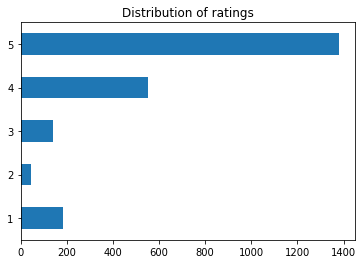

In [14]:
#Lets have a look at the distribution of ratings 

df['Rating'].value_counts().sort_index().plot(kind='barh', title= 'Distribution of ratings')

In [15]:
#there seem to be many 5 ratings and less 2 ratings, so we can say that product
#service is good

In [19]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [26]:
#Lets look at first review and try to get to know if customer liked it or not
df.iloc[0]['Review']

'Best under 60k Great performanceI got it for around 58500Battery backup is bit low but thanks to rapid charger its very fast Display is Ok for this price range Decent speakers with many customisation optionsVantage software is so good for customisationOverall good performance till nowWill update later if any problem occurs'

In [28]:
#Looks like overall the customer is happy with performance, lets see what
#our vader model has to say
sia.polarity_scores(df.iloc[0]['Review'])

{'neg': 0.073, 'neu': 0.613, 'pos': 0.314, 'compound': 0.9579}

In [29]:
#it mostly indicated for a positivity and a bit of neutralism but overall 
#it gave a rating 0.9 which is a sign of positivity as its close to 1

In [34]:
#now we run polarity scores for all reviews and store them and look the distribution
#and see if it matches a trend

In [35]:
#as there is no Id column, we shall insert it
df['Id'] = range(1, len(df)+1)
df = df.reset_index()

In [37]:
result = dict()


for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['Review']
    id = row['Id']
    result[id] = sia.polarity_scores(text)

  0%|          | 0/2304 [00:00<?, ?it/s]

In [40]:
vaders = pd.DataFrame(result).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(df, how='left')
#we are converting result dictionary to dataframe and then we merge with df

In [41]:
vaders.head()

,Id,neg,neu,pos,compound,index,Product_name,Review,Rating
0,1,0.073,0.613,0.314,0.9579,0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,2,0.000,0.256,0.744,0.4404,1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,3,0.000,0.881,0.119,0.5789,2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,4,0.000,0.432,0.568,0.8808,3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,5,0.000,0.533,0.467,0.8360,4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5


In [42]:
#As we may expect that for our distribution of ratings to have a trend
#As we move from 1 to 5 ratings, the distribution should increase for positive
#and vice versa when we do for the negative

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Rating', ylabel='pos'>

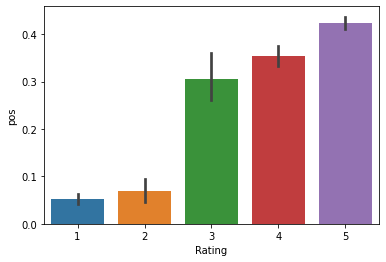

In [45]:
#lets see if that holds
sns.barplot(data=vaders, x='Rating', y='pos')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Rating', ylabel='neg'>

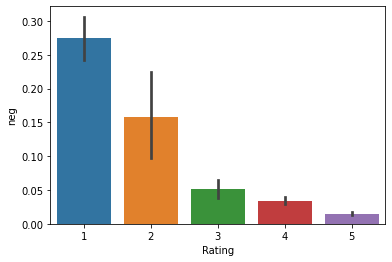

In [46]:
sns.barplot(data=vaders, x='Rating', y='neg')

In [47]:
#It exactly the way we wanted it to be
#This shows that our analysis has been efficient
#Lets also perform for compound to see overall distribution

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Rating', ylabel='compound'>

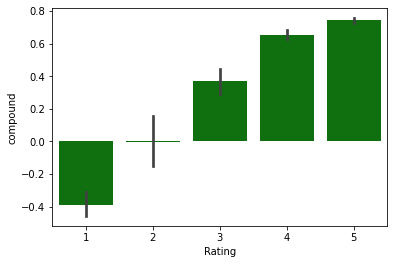

In [61]:
sns.barplot(data=vaders, x='Rating', y='compound', color='green')

In [62]:
#From this distribution we can understand few important things
#The 1 star reviews were mostly negative and customers werent satisfied
#The 2 star reviews were netural indicating that there were both negative and positive
#ratings too as from the figure we can see that distribution for 2 star 
#is very small
#For 3, 4 and 5 star reviews, customers usually reflected positivity and the distribution increases
#as we go from left to right
